In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')


In [3]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [1]:
# Data Cleaning

In [4]:
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [5]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')
df.info()
# Missing values in total charges

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

In [6]:
# Total charges = Monthly charges * Tenure
df['TotalCharges'].fillna(df['MonthlyCharges']*df['tenure'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

In [2]:
# DATA DESCRIPTION

In [7]:
print("NO OF CUSTOMERS: ",df['customerID'].nunique())
print("NO OF MALE CUST: ",df['gender'].value_counts()[0])
print("NO OF FEMALE CUST : ",df['gender'].value_counts()[1])
print("NO OF SENIOR CUSTOMERS: ",df['SeniorCitizen'].value_counts()[1])


NO OF CUSTOMERS:  7043
NO OF MALE CUST:  3555
NO OF FEMALE CUST :  3488
NO OF SENIOR CUSTOMERS:  1142


In [8]:
df.sort_values('TotalCharges')


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.00,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.00,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.00,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.00,No
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.00,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.00,No
6754,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,0.00,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.00,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.00,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0.00,No


In [9]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
for i in df.columns[1:]:
    if i not in ['tenure','MonthlyCharges','TotalCharges']:
        print(i,df[i].unique())

gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ['No' 'Yes']


In [11]:
df.describe()['TotalCharges']

count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

In [12]:
df.describe()['MonthlyCharges']


count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [3]:
# Top Customers

In [13]:
custvstot=df.groupby('customerID')[['MonthlyCharges']].sum().sort_values(by=['MonthlyCharges'],ascending=False).head(10)
custvstot


,MonthlyCharges
customerID,
7569-NMZYQ,118.75
8984-HPEMB,118.65
5734-EJKXG,118.60
5989-AXPUC,118.60
8199-ZLLSA,118.35
9924-JPRMC,118.20
2889-FPWRM,117.80
3810-DVDQQ,117.60
9739-JLPQJ,117.50


In [14]:
df['tenure'].max()


72

In [15]:
#sns.distplot(df['TotalCharges'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [4]:
# Data VISUALIZATION

Text(0.5, 0, 'YES - 1  NO - 0')

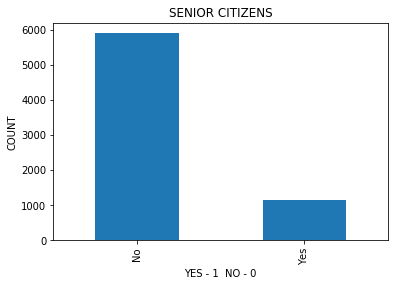

In [16]:
df["SeniorCitizen"] = df["SeniorCitizen"].replace({1:"Yes",0:"No"})
df.SeniorCitizen.value_counts().plot(kind='bar')
plt.title('SENIOR CITIZENS')
plt.ylabel('COUNT')
plt.xlabel('YES - 1  NO - 0')

Text(0.5, 1.0, 'COUNT OF PARTNER/NON PARTNER')

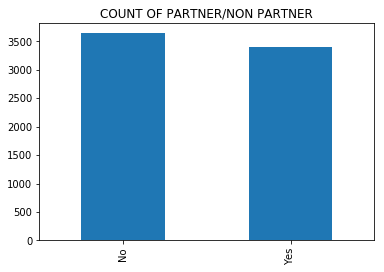

In [17]:
df.Partner.value_counts().plot(kind='bar')
plt.title('COUNT OF PARTNER/NON PARTNER')

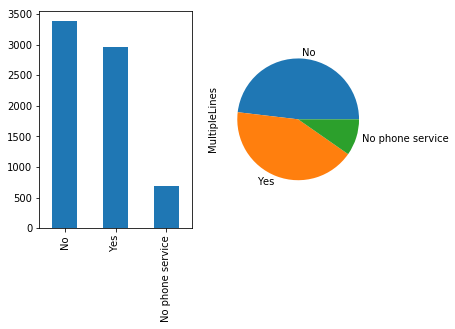

In [18]:
fig,axs=plt.subplots(1,2)
df.MultipleLines.value_counts().plot(kind='bar',ax=axs[0])
df.MultipleLines.value_counts().plot(kind='pie',ax=axs[1])

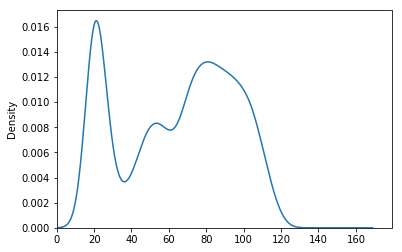

In [19]:
df['MonthlyCharges'].plot(kind='density',xlim=0,ylim=0)

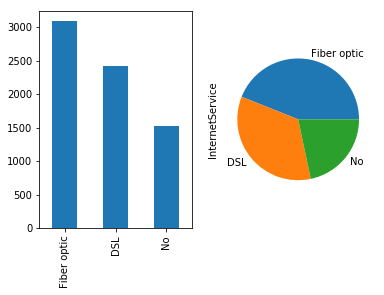

In [20]:
fig,axs=plt.subplots(1,2)
df.InternetService.value_counts().plot(kind='bar',ax=axs[0])
df.InternetService.value_counts().plot(kind='pie',ax=axs[1])

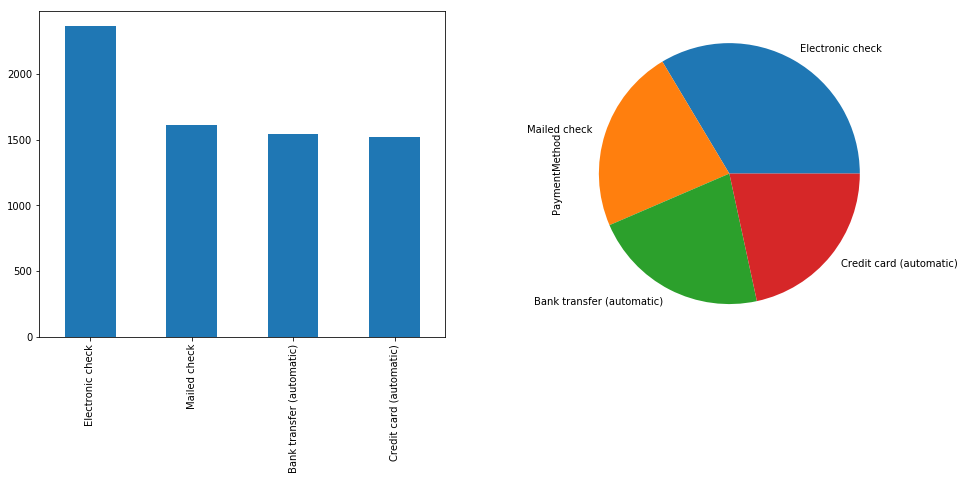

In [21]:
fig,axs=plt.subplots(1,2)
df.PaymentMethod.value_counts().plot(kind='bar',ax=axs[0],figsize=(16,6))
df.PaymentMethod.value_counts().plot(kind='pie',ax=axs[1])

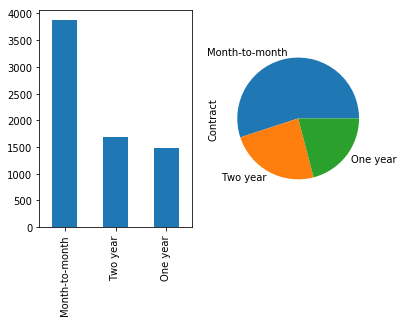

In [22]:
fig,axs=plt.subplots(1,2)
df.Contract.value_counts().plot(kind='bar',ax=axs[0])
df.Contract.value_counts().plot(kind='pie',ax=axs[1])

No     5174
Yes    1869
Name: Churn, dtype: int64

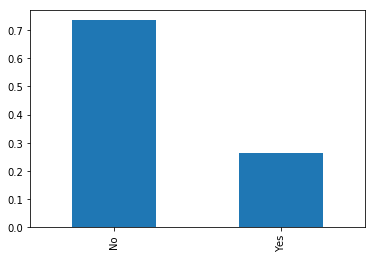

In [23]:
df.Churn.value_counts(normalize=True).plot(kind='bar')
df['Churn'].value_counts()

In [24]:
print("% Customers that Churn : ",100*df['Churn'].value_counts()[1]/(df['Churn'].value_counts()[0]+df['Churn'].value_counts()[1]))

% Customers that Churn :  26.536987079369588


In [5]:
# INSIGHTS FROM THE DATA

In [6]:
# Churn VS Gender

Churn  gender
No     Male      2625
       Female    2549
Yes    Female     939
       Male       930
Name: gender, dtype: int64


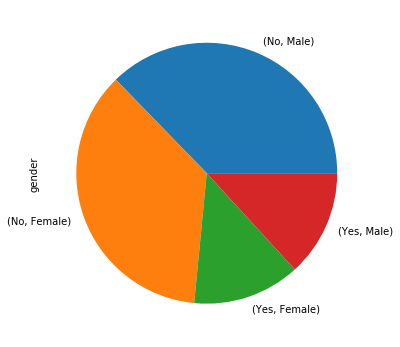

In [25]:
print(df.groupby('Churn')['gender'].value_counts())
df.groupby('Churn')['gender'].value_counts().plot(kind='pie',figsize=(8,6))

In [7]:
# From churn vs gender, its found that there is no correlation between churn and gender ( Churn of M and F are almost the same)

In [8]:
# Churn VS PHONE SERVICE

AxesSubplot(0.125,0.125;0.775x0.755)
Churn  PhoneService
No     Yes             4662
       No               512
Yes    Yes             1699
       No               170
Name: PhoneService, dtype: int64
% churn without PhoneService =  73.29036315044804


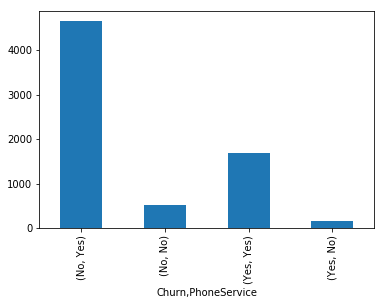

In [26]:
print(df.groupby('Churn')['PhoneService'].value_counts().plot(kind='bar'))
print(df.groupby('Churn')['PhoneService'].value_counts())
k=(df.groupby('Churn')['PhoneService'].value_counts()['Yes']['Yes'])*100/(df.groupby('Churn')['PhoneService'].value_counts()['No']['Yes']+df.groupby('Churn')['PhoneService'].value_counts()['Yes']['Yes'])
print('% churn without PhoneService = ',100-k)

In [9]:
# 73.29 % Customers without Phone Service leave the next month

In [10]:
# Churn VS Dependents

AxesSubplot(0.125,0.125;0.775x0.755)
Churn  Dependents
No     No            3390
       Yes           1784
Yes    No            1543
       Yes            326
Name: Dependents, dtype: int64
% Dependents that stay after 1 month =  84.54976303317535


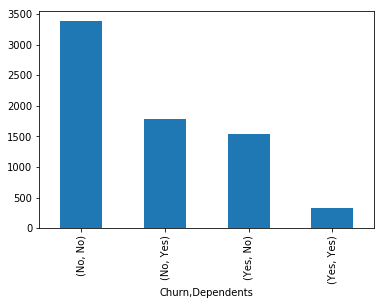

In [27]:
print(df.groupby('Churn')['Dependents'].value_counts().plot(kind='bar'))
print(df.groupby('Churn')['Dependents'].value_counts())
k=(df.groupby('Churn')['Dependents'].value_counts()['Yes']['Yes'])*100/(df.groupby('Churn')['Dependents'].value_counts()['No']['Yes']+df.groupby('Churn')['Dependents'].value_counts()['Yes']['Yes'])
print('% Dependents that stay after 1 month = ',100-k)

In [11]:
# 84.54% Customers with Dependents stay for the next month

In [12]:
# Churn VS InternetConnection

AxesSubplot(0.125,0.125;0.775x0.755)
Churn  InternetService
No     DSL                1962
       Fiber optic        1799
       No                 1413
Yes    Fiber optic        1297
       DSL                 459
       No                  113
Name: InternetService, dtype: int64


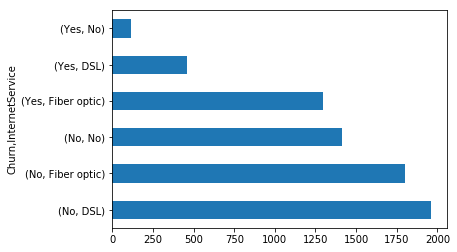

In [28]:
print(df.groupby('Churn')['InternetService'].value_counts().plot(kind='barh'))
print(df.groupby('Churn')['InternetService'].value_counts())


In [13]:
# FiberOptic Service has highest churn rate

In [14]:
# Churn VS Partner

In [29]:
print(df.groupby('Churn')['Partner'].value_counts())
k=(df.groupby('Churn')['Partner'].value_counts()['Yes']['Yes'])*100/(df.groupby('Churn')['Partner'].value_counts()['No']['Yes'])
print('% Partners that stay after 1 month = ',100-k)

Churn  Partner
No     Yes        2733
       No         2441
Yes    No         1200
       Yes         669
Name: Partner, dtype: int64
% Partners that stay after 1 month =  75.52140504939626


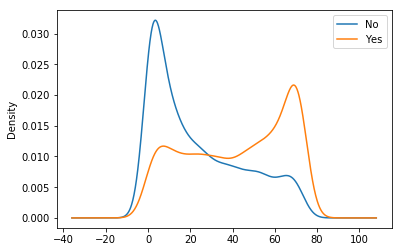

In [30]:
df.groupby('Partner')['tenure'].plot(kind='density')
plt.legend()

In [15]:
# Partners have a lower churn rate AND remain as a customer for a longer tenure

In [16]:
# Churn VS TechSupport

AxesSubplot(0.125,0.125;0.775x0.755)
Churn  TechSupport        
No     No                     2027
       Yes                    1734
       No internet service    1413
Yes    No                     1446
       Yes                     310
       No internet service     113
Name: TechSupport, dtype: int64


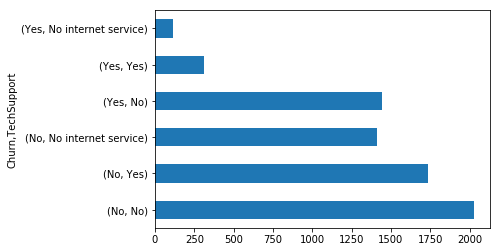

In [31]:
print(df.groupby('Churn')['TechSupport'].value_counts().plot(kind='barh'))
print(df.groupby('Churn')['TechSupport'].value_counts())

In [17]:
# We see that TechSupport plays a major role on churn rate, Customers with TechSupport has lower churn rate

In [18]:
# Churn VS Contract

AxesSubplot(0.260833,0.125;0.503333x0.755)
Churn  Contract      
No     Month-to-month    2220
       Two year          1647
       One year          1307
Yes    Month-to-month    1655
       One year           166
       Two year            48
Name: Contract, dtype: int64


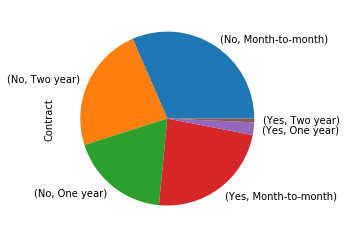

In [32]:
print(df.groupby('Churn')['Contract'].value_counts().plot(kind='pie'))
#print(df.groupby('Churn')['Contract'].value_counts()['Yes'].plot(kind='bar'))
#print(df.groupby('Churn')['Contract'].value_counts()['No'].plot(kind='bar'))
print(df.groupby('Churn')['Contract'].value_counts())

In [19]:
# Customers with 2 years Contract have a lower Churn Rate

In [20]:
# Churn VS MonthlyCharges

In [33]:
print(df.where(df['Churn']=='Yes')['MonthlyCharges'].median())
print(df.where(df['Churn']=='No')['MonthlyCharges'].median())



79.65
64.42500000000001


In [21]:
# Customers that Churn have  Higher Median Monthly Charges

In [22]:
# Churn VS Streaming

AxesSubplot(0.125,0.125;0.775x0.755)
Churn  StreamingMovies    
No     Yes                    1914
       No                     1847
       No internet service    1413
Yes    No                      938
       Yes                     818
       No internet service     113
Name: StreamingMovies, dtype: int64
Churn  StreamingTV        
No     Yes                    1893
       No                     1868
       No internet service    1413
Yes    No                      942
       Yes                     814
       No internet service     113
Name: StreamingTV, dtype: int64


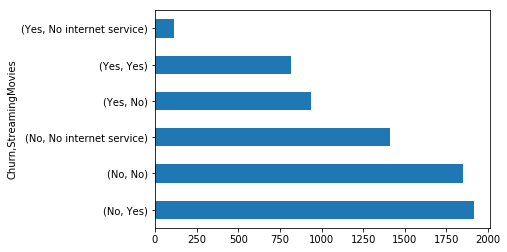

In [34]:
print(df.groupby('Churn')['StreamingMovies'].value_counts().plot(kind='barh'))
print(df.groupby('Churn')['StreamingMovies'].value_counts())
#print(df.groupby('Churn')['StreamingTV'].value_counts().plot(kind='pie'))
print(df.groupby('Churn')['StreamingTV'].value_counts())

In [23]:
# Churn VS SeniorCitizen

AxesSubplot(0.125,0.125;0.775x0.755)
Churn  SeniorCitizen
No     No               4508
       Yes               666
Yes    No               1393
       Yes               476
Name: SeniorCitizen, dtype: int64


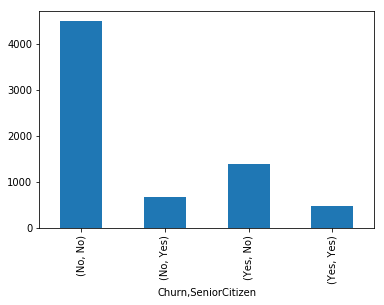

In [35]:
print(df.groupby('Churn')['SeniorCitizen'].value_counts().plot(kind='bar'))
print(df.groupby('Churn')['SeniorCitizen'].value_counts())

In [24]:
# Churn VS Billing

AxesSubplot(0.125,0.125;0.775x0.755)
Churn  PaperlessBilling
No     Yes                 2771
       No                  2403
Yes    Yes                 1400
       No                   469
Name: PaperlessBilling, dtype: int64


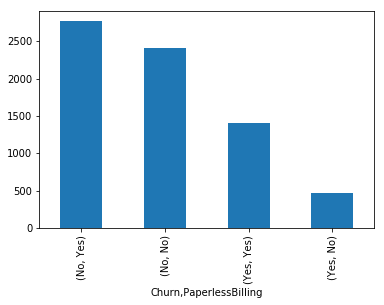

In [36]:
print(df.groupby('Churn')['PaperlessBilling'].value_counts().plot(kind='bar'))
print(df.groupby('Churn')['PaperlessBilling'].value_counts())

AxesSubplot(0.260833,0.125;0.503333x0.755)
Churn  PaymentMethod            
No     Mailed check                 1304
       Electronic check             1294
       Credit card (automatic)      1290
       Bank transfer (automatic)    1286
Yes    Electronic check             1071
       Mailed check                  308
       Bank transfer (automatic)     258
       Credit card (automatic)       232
Name: PaymentMethod, dtype: int64


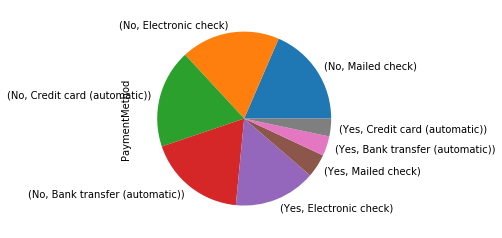

In [37]:
print(df.groupby('Churn')['PaymentMethod'].value_counts().plot(kind='pie'))
print(df.groupby('Churn')['PaymentMethod'].value_counts())